<a href="https://colab.research.google.com/github/TracyMabaso/Ncobile/blob/main/LAB03_230136850.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

Class distribution: [35 35 35]


Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


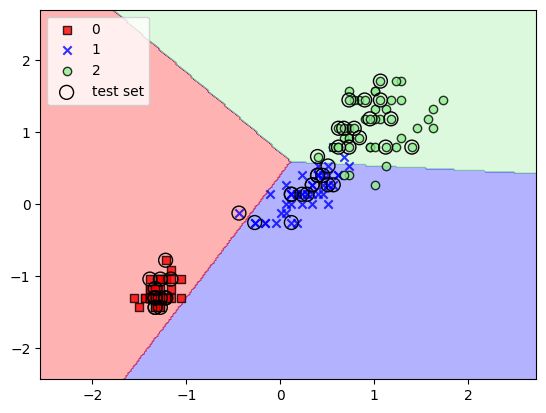

Text(0, 0.5, 'Petal width [standardized]')

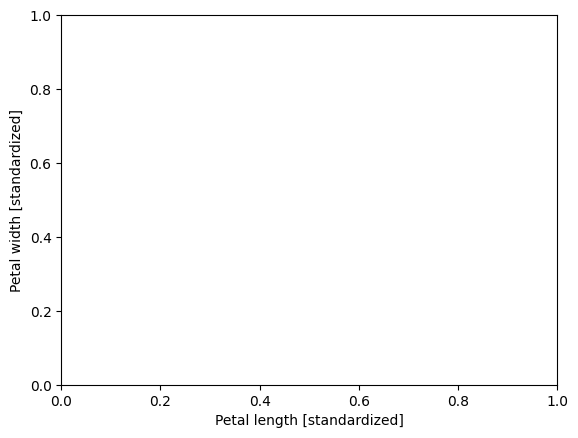

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy: 0.9777777777777777
Probabilities: [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


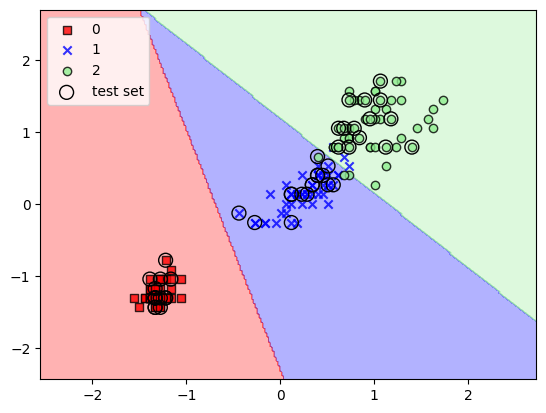

Text(0, 0.5, 'Petal width [standardized]')

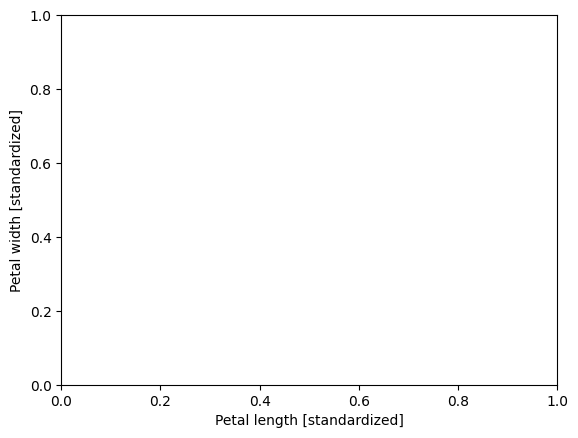

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Probabilities:', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


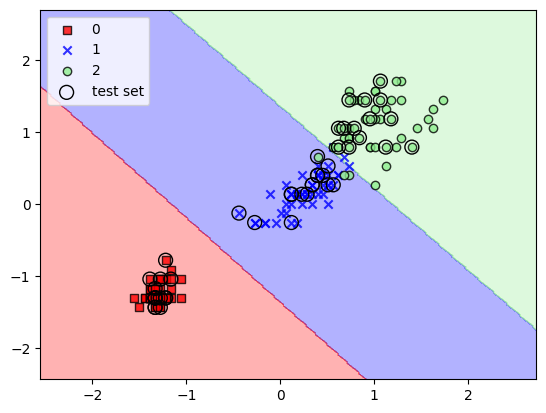

Text(0, 0.5, 'Petal width [standardized]')

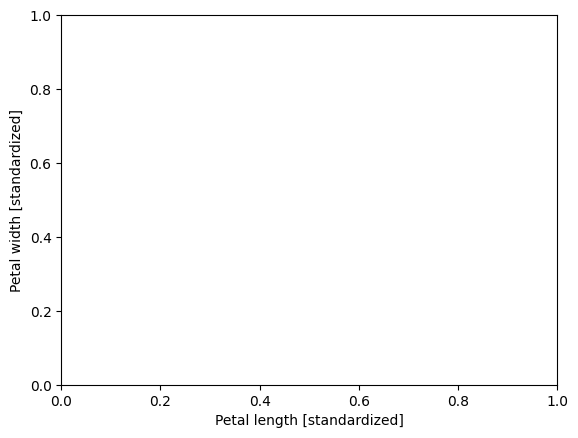

In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

Accuracy: 0.8333333333333334


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


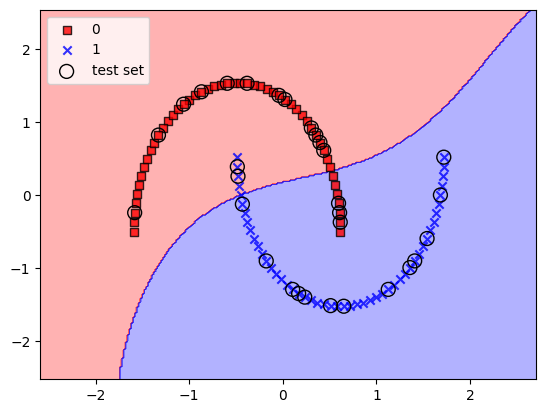

Text(0, 0.5, 'Feature 2 [standardized]')

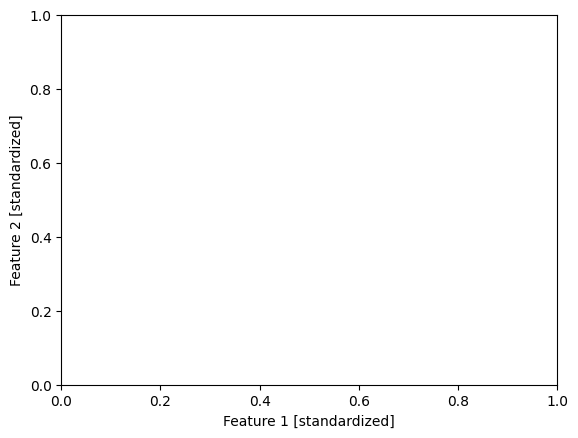

In [6]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm_rbf.fit(X_train_m_std, y_train_m)

y_pred_m = svm_rbf.predict(X_test_m_std)
print('Accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf, test_idx=range(len(X_train_m), len(X_combined_m_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')

Accuracy: 0.9777777777777777


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


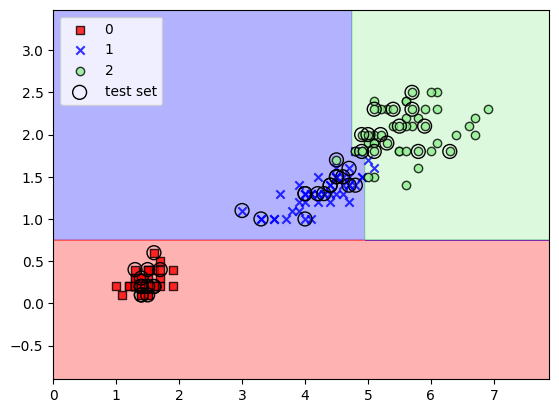

True

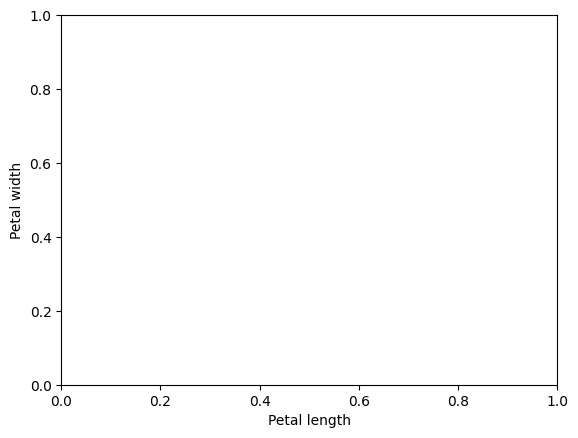

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  # No scaling needed

y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                          feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

Accuracy: 0.9777777777777777
Feature Importances: [0.52140135 0.47859865]


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


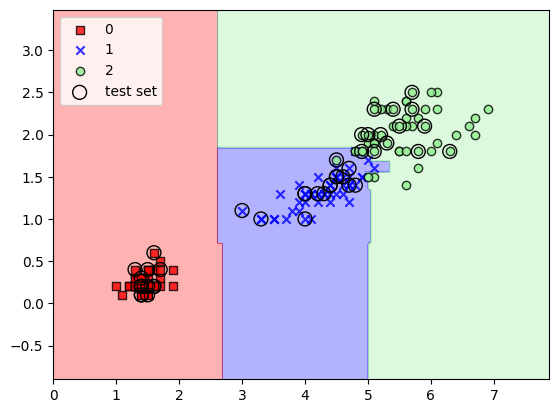

Text(0, 0.5, 'Petal width')

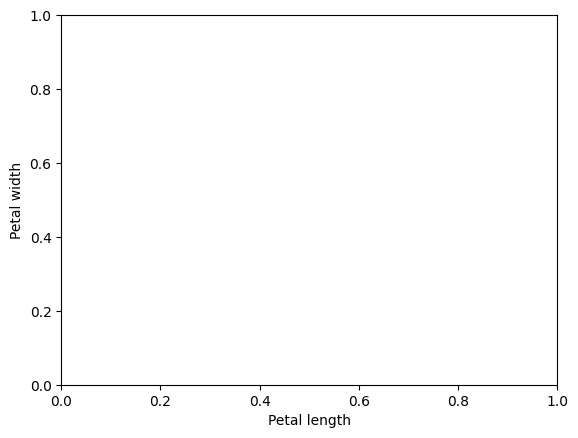

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')

Accuracy: 1.0


/tmp/ipython-input-3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


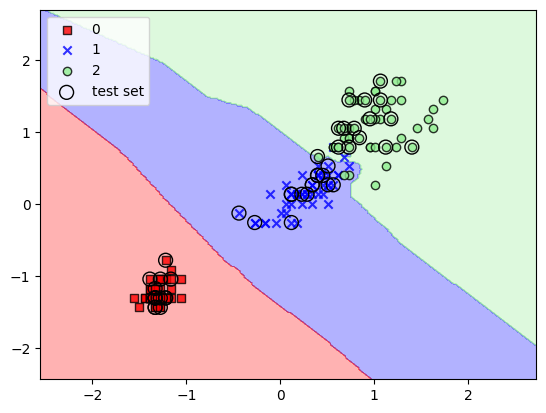

Text(0, 0.5, 'Petal width [standardized]')

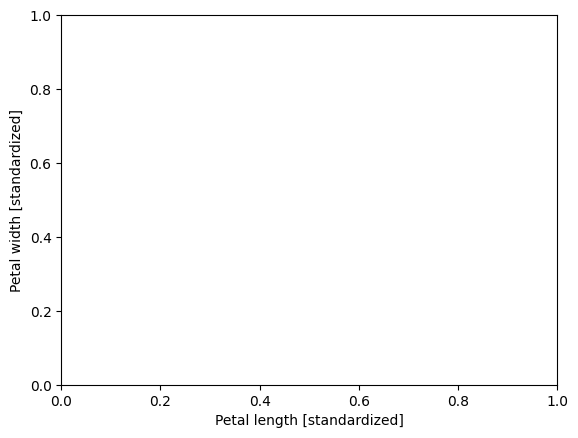

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_std, y_train)
print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

models = {'Perceptron': ppn, 'LogReg': lr, 'SVM': svm, 'Tree': tree, 'Forest': forest, 'KNN': knn}
for name, model in models.items():
    y_pred = model.predict(X_test_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')

Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9619047619047618
Perceptron Accuracy: 0.9777777777777777
LogReg Accuracy: 0.9777777777777777
SVM Accuracy: 0.9777777777777777
Tree Accuracy: 0.9777777777777777
Forest Accuracy: 0.9777777777777777
KNN Accuracy: 1.0
